# 0.0 Descrição do Projeto

## 0.1.1 Descrição do Projeto

A empresa Data Money fornece serviços de consultoria de Análise e Ciência de Dados para grandes
empresas no Brasil e no exterior. <br>
<br>
O seu principal diferencial de mercado em relação aos concorrentes é o alto retorno financeiro para as
empresas clientes, graças a performance de seus algoritmos de Machine Learning.<br>
<br>
A Data Money acredita que a expertise no treinamento e ajuste fino dos algoritmos, feito pelos Cientistas de
Dados da empresa, é a principal motivo dos ótimos resultados que as consultorias vem entregando aos seus
clientes.<br>
<br>
Para continuar crescendo a expertise do time, os Cientistas de Dados acreditam que é extremamente
importante realizar ensaios nos algoritmos de Machine Learning para adquirir uma experiência cada vez
maior sobre o seu funcionamento e em quais cenários as performances são máximas e mínimas, para que a
escolha do algoritmo para cada situação seja a mais correta possível.<br>
<br>
Como Cientista de Dados recém contratado pela empresa, a sua principal tarefa será realizar 3 ensaios com
algoritmos de Classificação, Regressão e Clusterização, a fim de extrair aprendizados sobre o seu
funcionamento em determinados cenário e conseguir transmitir esse conhecimento para o restante do time.

## 0.2.1 Imports

In [1]:
import warnings

import pandas as pd
import numpy  as np

from matplotlib import pyplot        as plt
from sklearn    import tree          as tr
from sklearn    import metrics       as mt
from sklearn    import ensemble      as en
from sklearn    import linear_model  as lm
from sklearn    import linear_model  as lm
from sklearn    import preprocessing as pp
from sklearn    import cluster       as ct

from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings( 'ignore' )

# 1.0 Classificação

## 1.1 Load Datasets

In [2]:
#Classificação
X_train_classi = pd.read_csv('Classificação/X_training.csv')
X_val_classi = pd.read_csv('Classificação/X_validation.csv')
X_test_classi = pd.read_csv('Classificação/X_test.csv')
y_train_classi = pd.read_csv('Classificação/y_training.csv')
y_val_classi = pd.read_csv('Classificação/y_validation.csv')
y_test_classi = pd.read_csv('Classificação/y_test.csv')

## 1.2 Dados de Treinamento

### 1.2.1 KNN

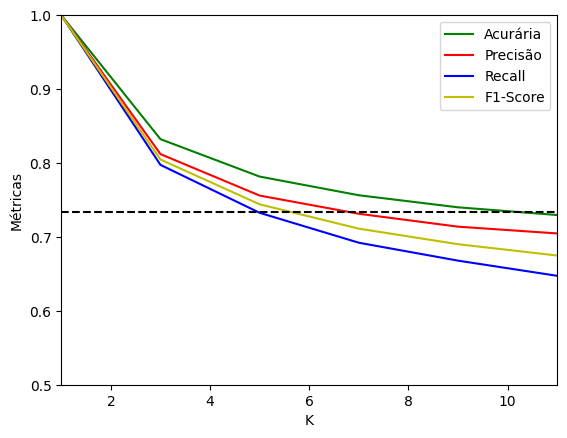

In [43]:
#definição do k
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(1,12,2)
for i in intervalo:
    #define
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    

    #train
    knn_classifier.fit(X_train_classi,y_train_classi)

    #performance
    yhat_knn_train = knn_classifier.predict(X_train_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_train_classi,yhat_knn_train)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_train_classi,yhat_knn_train)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_train_classi,yhat_knn_train)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_train_classi,yhat_knn_train)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 0.733
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('K');
plt.ylabel('Métricas');
plt.hlines(worst_mt,1,11,color='k',linestyle='--');
plt.xlim((1, 11));
plt.ylim((0.5, 1));
plt.legend();

In [4]:
#define
#Para chegar no resultado, o k teria que ser 5
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors = k)

#train
knn_classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_knn_train = knn_classifier.predict(X_train_classi)

acc_knn_train = mt.accuracy_score(y_train_classi,yhat_knn_train)
prec_knn_train = mt.precision_score(y_train_classi,yhat_knn_train)
rec_knn_train = mt.recall_score(y_train_classi,yhat_knn_train)
f1_knn_train = mt.f1_score(y_train_classi,yhat_knn_train)

d = {'Algoritmo' : 'KNN','Acurácia': acc_knn_train, 'Precisão': prec_knn_train, 'Recall': rec_knn_train, 'F1-Score': f1_knn_train}
knn_train = pd.DataFrame(data = d,index=[0])
knn_train

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.832186,0.812008,0.79741,0.804643


### 1.2.2 Decision Tree

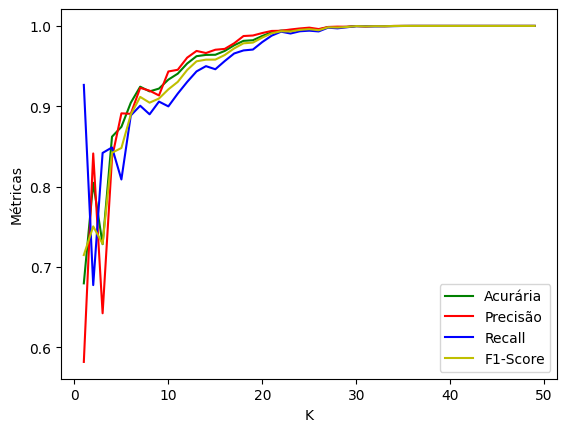

In [15]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(1,50,1)
for i in intervalo:
    #define
    knn_classifier = tr.DecisionTreeClassifier(max_depth=i,max_features='auto')
    #print(f'i = {i}')
    #train
    knn_classifier.fit(X_train_classi,y_train_classi)

    #performance
    yhat_knn_train = knn_classifier.predict(X_train_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_train_classi,yhat_knn_train)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_train_classi,yhat_knn_train)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_train_classi,yhat_knn_train)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_train_classi,yhat_knn_train)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 1
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('K');
plt.ylabel('Métricas');
plt.legend();

In [6]:
#Desision tree tende a decorar os dados de treino
#define
classifier = tr.DecisionTreeClassifier(max_features='auto')

#train
classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_train = classifier.predict(X_train_classi)
    
#métricas
acc_train = mt.accuracy_score(y_train_classi,yhat_train)
prec_train = mt.precision_score(y_train_classi,yhat_train)
rec_train = mt.recall_score(y_train_classi,yhat_train)
f1_train = mt.f1_score(y_train_classi,yhat_train)

d = {'Algoritmo' : 'Decision Tree Classifier','Acurácia': acc_train, 'Precisão': prec_train, 'Recall': rec_train, 'F1-Score': f1_train}
dt_train = pd.DataFrame(data = d,index=[0])
dt_train

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Decision Tree Classifier,1.0,1.0,1.0,1.0


### 1.2.3 Random Forest

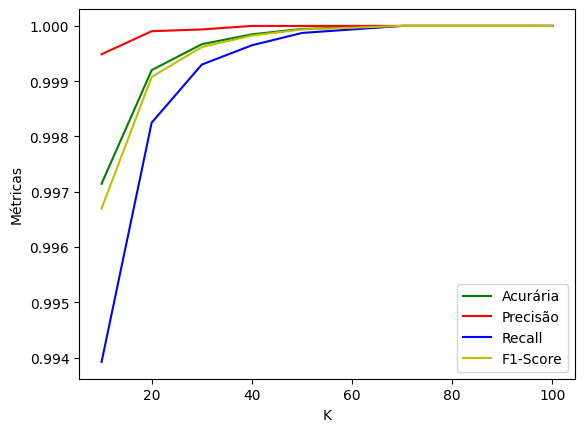

In [13]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(10,101,10)
for i in intervalo:
    #define
    knn_classifier = en.RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=0)
    #print(f'i = {i}')
    #train
    knn_classifier.fit(X_train_classi,y_train_classi)

    #performance
    yhat_knn_train = knn_classifier.predict(X_train_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_train_classi,yhat_knn_train)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_train_classi,yhat_knn_train)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_train_classi,yhat_knn_train)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_train_classi,yhat_knn_train)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 1
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('K');
plt.ylabel('Métricas');
plt.legend();

In [7]:
#A partir de 70 árvores a Random Forest encontra os valores máximos
#define
classifier = en.RandomForestClassifier(n_jobs=-1,n_estimators=80,random_state=0)

#train
classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_train = classifier.predict(X_train_classi)
    
#métricas
acc_train = mt.accuracy_score(y_train_classi,yhat_train)
prec_train = mt.precision_score(y_train_classi,yhat_train)
rec_train = mt.recall_score(y_train_classi,yhat_train)
f1_train = mt.f1_score(y_train_classi,yhat_train)

d = {'Algoritmo' : 'Random Forest Classifier','Acurácia': acc_train, 'Precisão': prec_train, 'Recall': rec_train, 'F1-Score': f1_train}
rf_train = pd.DataFrame(data = d,index=[0])
rf_train

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Random Forest Classifier,1.0,1.0,1.0,1.0


### 1.2.4 Logistic Regression

In [8]:
#define
#solver teria que ser ‘lbfgs’ para o resultado esperado
classifier = lm.LogisticRegression(solver='newton-cholesky')

#train
classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_train = classifier.predict(X_train_classi)
    
#métricas
acc_train = mt.accuracy_score(y_train_classi,yhat_train)
prec_train = mt.precision_score(y_train_classi,yhat_train)
rec_train = mt.recall_score(y_train_classi,yhat_train)
f1_train = mt.f1_score(y_train_classi,yhat_train)

d = {'Algoritmo' : 'Logistic Regression','Acurácia': acc_train, 'Precisão': prec_train, 'Recall': rec_train, 'F1-Score': f1_train}
lr_train = pd.DataFrame(data = d,index=[0])
lr_train

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Logistic Regression,0.876081,0.871606,0.837438,0.85418


### 1.2.5 Resultado do Ensaio

In [9]:
classifier_train = pd.concat([knn_train,dt_train,rf_train,lr_train]).reset_index(drop=True)
classifier_train

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.832186,0.812008,0.797410,0.804643
1,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,0.876081,0.871606,0.837438,0.854180


## 1.3 Dados de Validação

### 1.3.1 KNN

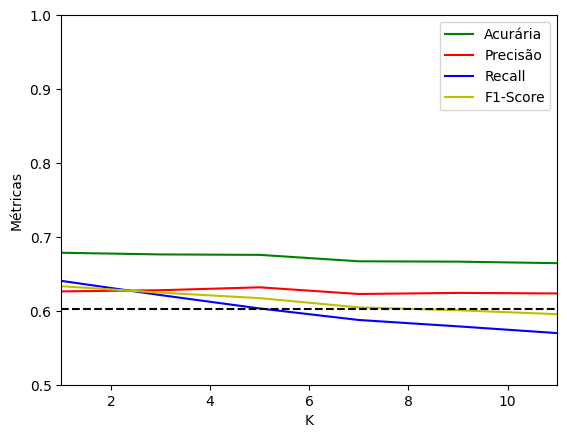

In [40]:
#definição do k
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(1,12,2)
for i in intervalo:
    #define
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    

    #train
    knn_classifier.fit(X_train_classi,y_train_classi)

    #performance
    yhat_val = knn_classifier.predict(X_val_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_val_classi,yhat_val)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_val_classi,yhat_val)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_val_classi,yhat_val)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_val_classi,yhat_val)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 0.603
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('K');
plt.ylabel('Métricas');
plt.hlines(worst_mt,1,11,color='k',linestyle='--');
plt.xlim((1, 11));
plt.ylim((0.5, 1));
plt.legend();

In [10]:
#define
#Para chegar no resultado, o k teria que ser 5
k = 3
classifier = KNeighborsClassifier(n_neighbors = k)

#train
classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_val = classifier.predict(X_val_classi)

acc_val = mt.accuracy_score(y_val_classi,yhat_val)
prec_val = mt.precision_score(y_val_classi,yhat_val)
rec_val = mt.recall_score(y_val_classi,yhat_val)
f1_val = mt.f1_score(y_val_classi,yhat_val)

d = {'Algoritmo' : 'KNN','Acurácia': acc_val, 'Precisão': prec_val, 'Recall': rec_val, 'F1-Score': f1_val}
knn_val = pd.DataFrame(data = d,index=[0])
knn_val

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.676277,0.627851,0.621278,0.624548


### 1.3.2 Decision Tree

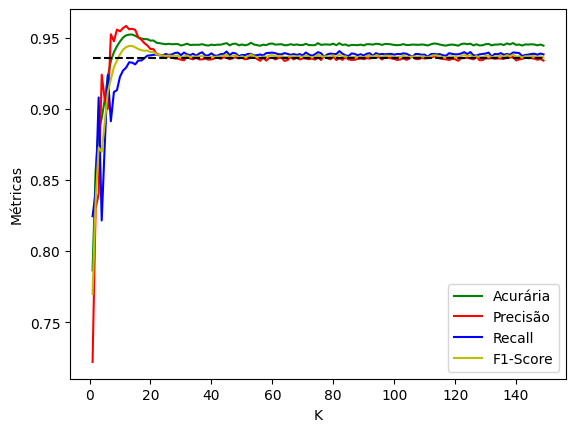

In [52]:
#definição do k
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(1,150,1)
for i in intervalo:
    #define
    knn_classifier = tr.DecisionTreeClassifier(max_depth=i)
    
    #train
    knn_classifier.fit(X_train_classi,y_train_classi)

    #performance
    yhat_val = knn_classifier.predict(X_val_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_val_classi,yhat_val)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_val_classi,yhat_val)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_val_classi,yhat_val)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_val_classi,yhat_val)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 0.936
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('K');
plt.ylabel('Métricas');
plt.hlines(worst_mt,min(intervalo),max(intervalo),color='k',linestyle='--');
plt.legend();

In [11]:
#define
classifier = tr.DecisionTreeClassifier()

#train
classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_val = classifier.predict(X_val_classi)

acc_val = mt.accuracy_score(y_val_classi,yhat_val)
prec_val = mt.precision_score(y_val_classi,yhat_val)
rec_val = mt.recall_score(y_val_classi,yhat_val)
f1_val = mt.f1_score(y_val_classi,yhat_val)

d = {'Algoritmo' : 'Decision Tree Classifier','Acurácia': acc_val, 'Precisão': prec_val, 'Recall': rec_val, 'F1-Score': f1_val}
dt_val = pd.DataFrame(data = d,index=[0])
dt_val

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Decision Tree Classifier,0.946105,0.935524,0.940456,0.937984


### 1.3.3 Random Forest

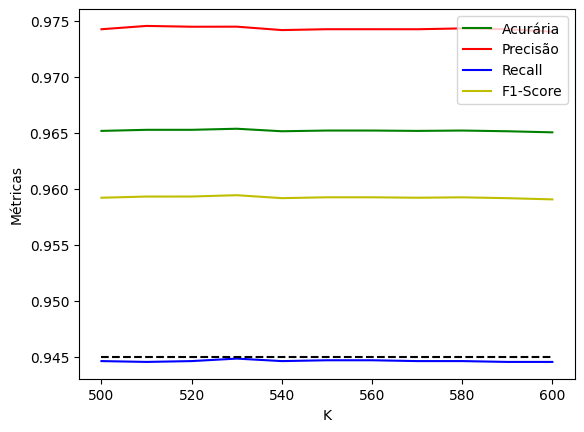

In [3]:
#definição do k
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(500,601,10)
for i in intervalo:
    #define
    knn_classifier = en.RandomForestClassifier(n_jobs=-1,n_estimators=i,random_state=0)
    
    #train
    knn_classifier.fit(X_train_classi,y_train_classi)

    #performance
    yhat_val = knn_classifier.predict(X_val_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_val_classi,yhat_val)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_val_classi,yhat_val)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_val_classi,yhat_val)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_val_classi,yhat_val)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 0.945
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('K');
plt.ylabel('Métricas');
plt.hlines(worst_mt,min(intervalo),max(intervalo),color='k',linestyle='--');
plt.legend();

In [13]:
#define
#Como a Reccal é minha métrica melhor, estou escolhendo quando ela for máxima para ter meu valores
classifier = en.RandomForestClassifier(n_jobs=-1,random_state=0,n_estimators=530)

#train
classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_val = classifier.predict(X_val_classi)

acc_val = mt.accuracy_score(y_val_classi,yhat_val)
prec_val = mt.precision_score(y_val_classi,yhat_val)
rec_val = mt.recall_score(y_val_classi,yhat_val)
f1_val = mt.f1_score(y_val_classi,yhat_val)

d = {'Algoritmo' : 'Random Forest Classifier','Acurácia': acc_val, 'Precisão': prec_val, 'Recall': rec_val, 'F1-Score': f1_val}
rf_val = pd.DataFrame(data = d,index=[0])
rf_val

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Random Forest Classifier,0.965379,0.9745,0.944836,0.959439


### 1.3.4 Logistic Regression

In [14]:
#define
#solver teria que ser ‘lbfgs’ para o resultado esperado
classifier = lm.LogisticRegression(solver='newton-cholesky')

#train
classifier.fit(X_train_classi,y_train_classi)

#performance
yhat_val = classifier.predict(X_val_classi)

acc_val = mt.accuracy_score(y_val_classi,yhat_val)
prec_val = mt.precision_score(y_val_classi,yhat_val)
rec_val = mt.recall_score(y_val_classi,yhat_val)
f1_val = mt.f1_score(y_val_classi,yhat_val)

d = {'Algoritmo' : 'Logistic Regression','Acurácia': acc_val, 'Precisão': prec_val, 'Recall': rec_val, 'F1-Score': f1_val}
lr_val = pd.DataFrame(data = d,index=[0])
lr_val

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Logistic Regression,0.874385,0.869277,0.835845,0.852233


### 1.3.5 Resultado do Ensaio

In [15]:
classifier_val = pd.concat([knn_val,dt_val,rf_val,lr_val]).reset_index(drop=True)
classifier_val

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.676277,0.627851,0.621278,0.624548
1,Decision Tree Classifier,0.946105,0.935524,0.940456,0.937984
2,Random Forest Classifier,0.965379,0.974500,0.944836,0.959439
3,Logistic Regression,0.874385,0.869277,0.835845,0.852233


## 1.4 Dados de Teste

### 1.4.1 KNN

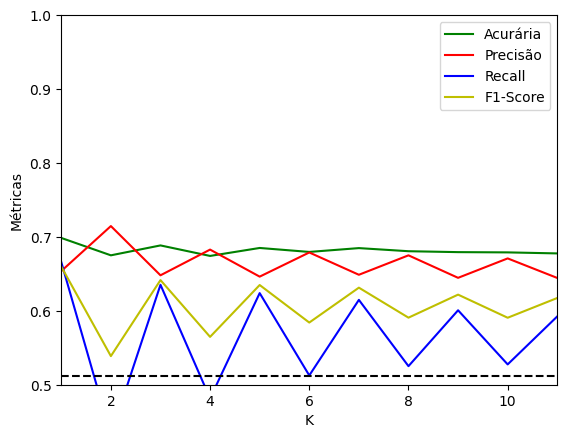

In [38]:
#definição do k
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(1,12,1)
for i in intervalo:
    #define
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    

    #train
    knn_classifier.fit(pd.concat([X_train_classi,X_val_classi]),pd.concat([y_train_classi,y_val_classi]))

    #performance
    yhat_test = knn_classifier.predict(X_test_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_test_classi,yhat_test)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_test_classi,yhat_test)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_test_classi,yhat_test)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_test_classi,yhat_test)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 0.512
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('K');
plt.ylabel('Métricas');
plt.hlines(worst_mt,1,11,color='k',linestyle='--');
plt.xlim((1, 11));
plt.ylim((0.5, 1));
plt.legend();

In [16]:
#define
#Para chegar no resultado, o k teria que ser 5
k = 11
classifier = KNeighborsClassifier(n_neighbors = 6)

#train
classifier.fit(pd.concat([X_train_classi,X_val_classi]),pd.concat([y_train_classi,y_val_classi]))

#performance
yhat_test = classifier.predict(X_test_classi)

acc_test = mt.accuracy_score(y_test_classi,yhat_test)
prec_test = mt.precision_score(y_test_classi,yhat_test)
rec_test = mt.recall_score(y_test_classi,yhat_test)
f1_test = mt.f1_score(y_test_classi,yhat_test)

d = {'Algoritmo' : 'KNN','Acurácia': acc_test, 'Precisão': prec_test, 'Recall': rec_test, 'F1-Score': f1_test}
knn_test = pd.DataFrame(data = d,index=[0])
knn_test

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.679643,0.678904,0.512538,0.584106


### 1.4.2 Decision Tree

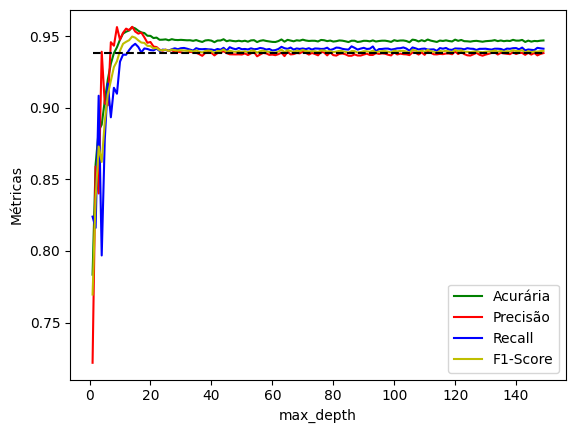

In [52]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(1,150,1)
for i in intervalo:
    #define
    knn_classifier = tr.DecisionTreeClassifier(max_depth=i)
    

    #train
    knn_classifier.fit(pd.concat([X_train_classi,X_val_classi]),pd.concat([y_train_classi,y_val_classi]))

    #performance
    yhat_test = knn_classifier.predict(X_test_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_test_classi,yhat_test)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_test_classi,yhat_test)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_test_classi,yhat_test)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_test_classi,yhat_test)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 0.938
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('max_depth');
plt.ylabel('Métricas');
plt.hlines(worst_mt,min(intervalo),max(intervalo),color='k',linestyle='--');
plt.legend();

In [17]:
#define
#Nesse caso foi testado todos os max_depth entre 1 e 150, o modelo mostra seu máximo em:
#print(f'Best Metrics with max_depth = {intervalo[rec_list.index(np.max(rec_list))]}')
classifier = tr.DecisionTreeClassifier(max_depth = 15)

#train
classifier.fit(pd.concat([X_train_classi,X_val_classi]),pd.concat([y_train_classi,y_val_classi]))

#performance
yhat_test = classifier.predict(X_test_classi)

acc_test = mt.accuracy_score(y_test_classi,yhat_test)
prec_test = mt.precision_score(y_test_classi,yhat_test)
rec_test = mt.recall_score(y_test_classi,yhat_test)
f1_test = mt.f1_score(y_test_classi,yhat_test)

d = {'Algoritmo' : 'Decision Tree Classifier','Acurácia': acc_test, 'Precisão': prec_test, 'Recall': rec_test, 'F1-Score': f1_test}
dt_test = pd.DataFrame(data = d,index=[0])
dt_test

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Decision Tree Classifier,0.954466,0.951908,0.943951,0.947913


### 1.4.3 Random Forest

i = 500
i = 520


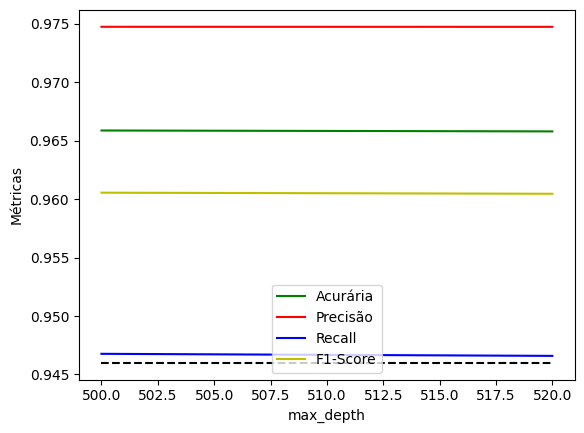

In [60]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []
intervalo = np.arange(500,521,20)
for i in intervalo:
    #define
    knn_classifier = en.RandomForestClassifier(n_jobs=-1,random_state=0,n_estimators=i)
    print(f'i = {i}')

    #train
    knn_classifier.fit(pd.concat([X_train_classi,X_val_classi]),pd.concat([y_train_classi,y_val_classi]))

    #performance
    yhat_test = knn_classifier.predict(X_test_classi)
    
    #métricas
    acc_knn_train = mt.accuracy_score(y_test_classi,yhat_test)
    acc_list.append(acc_knn_train)
    prec_knn_train = mt.precision_score(y_test_classi,yhat_test)
    prec_list.append(prec_knn_train)
    rec_knn_train = mt.recall_score(y_test_classi,yhat_test)
    rec_list.append(rec_knn_train)
    f1_knn_train = mt.f1_score(y_test_classi,yhat_test)
    f1_list.append(f1_knn_train)
    
#menor valor que uma métrica precisa ter
worst_mt = 0.946
plt.plot(intervalo,acc_list,'g',label='Acurária');
plt.plot(intervalo,prec_list,'r',label='Precisão');
plt.plot(intervalo,rec_list,'b',label='Recall');
plt.plot(intervalo,f1_list,'y',label='F1-Score');
plt.xlabel('max_depth');
plt.ylabel('Métricas');
plt.hlines(worst_mt,min(intervalo),max(intervalo),color='k',linestyle='--');
plt.legend();

In [18]:
#define
#print(f'Best Metrics with n_estimators = {intervalo[rec_list.index(np.max(rec_list))]}')
classifier = en.RandomForestClassifier(n_jobs=-1,random_state=0,n_estimators=500)

#train
classifier.fit(pd.concat([X_train_classi,X_val_classi]),pd.concat([y_train_classi,y_val_classi]))

#performance
yhat_test = classifier.predict(X_test_classi)

acc_test = mt.accuracy_score(y_test_classi,yhat_test)
prec_test = mt.precision_score(y_test_classi,yhat_test)
rec_test = mt.recall_score(y_test_classi,yhat_test)
f1_test = mt.f1_score(y_test_classi,yhat_test)

d = {'Algoritmo' : 'Random Forest Classifier','Acurácia': acc_test, 'Precisão': prec_test, 'Recall': rec_test, 'F1-Score': f1_test}
rf_test = pd.DataFrame(data = d,index=[0])
rf_test

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Random Forest Classifier,0.965859,0.974726,0.946766,0.960543


### 1.4.4 Logistic Regression

In [19]:
#define
classifier = lm.LogisticRegression(solver='newton-cholesky',n_jobs=-1)

#train
classifier.fit(pd.concat([X_train_classi,X_val_classi]),pd.concat([y_train_classi,y_val_classi]))

#performance
yhat_test = classifier.predict(X_test_classi)

acc_test = mt.accuracy_score(y_test_classi,yhat_test)
prec_test = mt.precision_score(y_test_classi,yhat_test)
rec_test = mt.recall_score(y_test_classi,yhat_test)
f1_test = mt.f1_score(y_test_classi,yhat_test)

d = {'Algoritmo' : 'Logistic Regression','Acurácia': acc_test, 'Precisão': prec_test, 'Recall': rec_test, 'F1-Score': f1_test}
lr_test = pd.DataFrame(data = d,index=[0])
lr_test

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,Logistic Regression,0.87178,0.868057,0.834756,0.851081


### 1.4.5 Resultado do Ensaio

In [20]:
classifier_test = pd.concat([knn_test,dt_test,rf_test,lr_test]).reset_index(drop=True)
classifier_test

,Algoritmo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.679643,0.678904,0.512538,0.584106
1,Decision Tree Classifier,0.954466,0.951908,0.943951,0.947913
2,Random Forest Classifier,0.965859,0.974726,0.946766,0.960543
3,Logistic Regression,0.871780,0.868057,0.834756,0.851081


# 2.0 Regressão

## 2.1 Load Datasets

In [2]:
#Regressão
X_train_reg = pd.read_csv('Regressão/X_training.csv')
X_val_reg = pd.read_csv('Regressão/X_validation.csv')
X_test_reg = pd.read_csv('Regressão/X_test.csv')
y_train_reg = pd.read_csv('Regressão/y_training.csv')
y_val_reg = pd.read_csv('Regressão/y_val.csv')
y_test_reg = pd.read_csv('Regressão/y_test.csv')

## 2.2 Dados de Treinamento

### 2.2.1 Linear Regression

In [50]:
#Na regressão medimos os erros para os pontos, dessa forma, quanto menor o erro, melhor

#define
regression = lm.LinearRegression(n_jobs = -1)

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_train = regression.predict(X_train_reg)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Linear Regression','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_train = pd.DataFrame(data = d,index=[0])
lr_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.046058,455.996112,21.354065,16.998249,8.653186


### 2.2.2 Decision Tree Regressor

In [63]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,100,1)
for i in intervalo:
    regression = tr.DecisionTreeRegressor(random_state=0,max_features='auto',max_depth=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_train = regression.predict(X_train_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.025572,465.788730,21.582139,17.158819,8.615678
2,0.043334,457.298367,21.384536,16.986509,8.500932
3,0.063005,447.895381,21.163539,16.833243,8.415119
4,0.086649,436.593329,20.894816,16.618123,8.268743
5,0.113523,423.747268,20.585122,16.368766,7.869536
...,...,...,...,...,...
95,0.991757,3.940403,1.985045,0.214099,0.082628
96,0.991757,3.940403,1.985045,0.214099,0.082628
97,0.991757,3.940403,1.985045,0.214099,0.082628
98,0.991757,3.940403,1.985045,0.214099,0.082628


In [51]:
#define
regression = tr.DecisionTreeRegressor()

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_train = regression.predict(X_train_reg)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Decision Tree Regressor','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
dt_train = pd.DataFrame(data = d,index=[0])
dt_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,0.991757,3.940403,1.985045,0.214099,0.082628


### 2.2.3 Random Forest Regressor

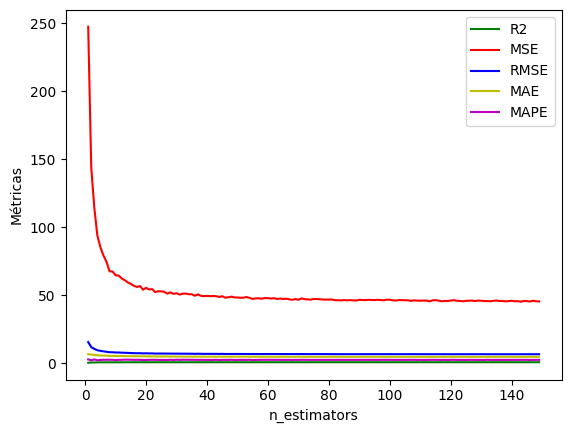

In [49]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,150,1)
for i in intervalo:
    regression = en.RandomForestRegressor(n_estimators=i,n_jobs=-1)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_train = regression.predict(X_train_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)
    
#menor valor que uma métrica precisa ter
plt.plot(intervalo,r2_list,'g',label='R2');
plt.plot(intervalo,mse_list,'r',label='MSE');
plt.plot(intervalo,rmse_list,'b',label='RMSE');
plt.plot(intervalo,mae_list,'y',label='MAE');
plt.plot(intervalo,mape_list,'m',label='MAPE');
plt.xlabel('n_estimators');
plt.ylabel('Métricas');
plt.legend();

In [52]:
#define
#print(f'Best Error Values with n_estimators = {intervalo[mae_list.index(np.min(mae_list))]}')
regression = en.RandomForestRegressor(n_estimators=138,n_jobs=-1)

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_train = regression.predict(X_train_reg)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Random Forest Regressor','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
rf_train = pd.DataFrame(data = d,index=[0])
rf_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Random Forest Regressor,0.905024,45.399703,6.73793,4.833369,2.544843


### 2.2.4 Polinomial Regression

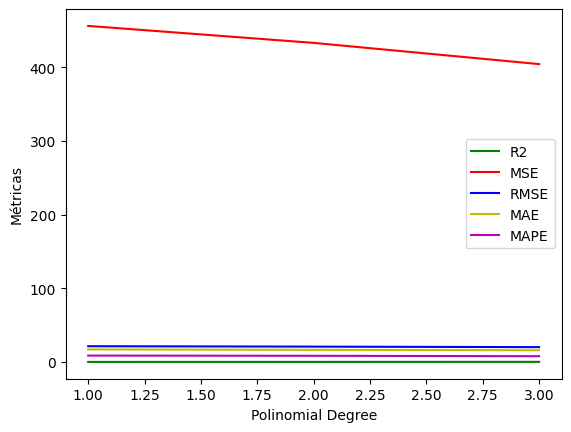

In [7]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,4,1)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=i)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

    regression = lm.LinearRegression()

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_train = regression.predict(X_poly)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)
    
#menor valor que uma métrica precisa ter
plt.plot(intervalo,r2_list,'g',label='R2');
plt.plot(intervalo,mse_list,'r',label='MSE');
plt.plot(intervalo,rmse_list,'b',label='RMSE');
plt.plot(intervalo,mae_list,'y',label='MAE');
plt.plot(intervalo,mape_list,'m',label='MAPE');
plt.xlabel('Polinomial Degree');
plt.ylabel('Métricas');
plt.legend();

In [53]:
#define
poly = pp.PolynomialFeatures(degree=2)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

regression = lm.LinearRegression()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_train = regression.predict(X_poly)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Polinomial Regression','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
pr_train = pd.DataFrame(data = d,index=[0])
pr_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression,0.094195,432.98621,20.808321,16.458032,8.35054


### 2.2.5 Linear Regression Lasso

In [28]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,10,1)
for i in intervalo:
    #define
    regression = lm.Lasso(alpha=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_train = regression.predict(X_train_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)

d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.007401,474.474834,21.782443,17.305484,8.736697
2,0.001125,477.474834,21.851198,17.355395,8.741522
3,0.000000,478.012560,21.863498,17.365090,8.742213
4,0.000000,478.012560,21.863498,17.365090,8.742213
5,0.000000,478.012560,21.863498,17.365090,8.742213
6,0.000000,478.012560,21.863498,17.365090,8.742213
7,0.000000,478.012560,21.863498,17.365090,8.742213
8,0.000000,478.012560,21.863498,17.365090,8.742213
9,0.000000,478.012560,21.863498,17.365090,8.742213


In [54]:
#define
regression = lm.Lasso()

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_train = regression.predict(X_train_reg)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Linear Regression Lasso','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
l_lasso_train = pd.DataFrame(data = d,index=[0])
l_lasso_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Lasso,0.007401,474.474834,21.782443,17.305484,8.736697


### 2.2.6 Linear Regression Ridge

In [31]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,10,1)
for i in intervalo:
    #define
    regression = lm.Ridge(alpha=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_train = regression.predict(X_train_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)

d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.046058,455.996401,21.354072,16.998308,8.653415
2,0.046056,455.997238,21.354092,16.998366,8.653638
3,0.046053,455.998584,21.354123,16.998441,8.653856
4,0.046049,456.000404,21.354166,16.998513,8.654068
5,0.046045,456.002667,21.354219,16.998596,8.654275
6,0.046039,456.005346,21.354282,16.998695,8.654478
7,0.046033,456.008415,21.354354,16.998801,8.654677
8,0.046025,456.011854,21.354434,16.998912,8.654871
9,0.046017,456.015643,21.354523,16.999022,8.655060


In [55]:
#define
regression = lm.Ridge()

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_train = regression.predict(X_train_reg)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Linear Regression Ridge','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
l_ridge_train = pd.DataFrame(data = d,index=[0])
l_ridge_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Ridge,0.046058,455.996401,21.354072,16.998308,8.653415


### 2.2.7 Linear Regression Elastic Net

In [36]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.01,1,0.01)
for i in intervalo:
    #define
    regression = lm.ElasticNet(alpha=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_train = regression.predict(X_train_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)

d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.01,0.045055,456.475703,21.365292,17.008724,8.663312
0.02,0.043349,457.291184,21.384368,17.022036,8.665589
0.03,0.041453,458.197269,21.405543,17.036788,8.667600
0.04,0.039562,459.101324,21.426650,17.051538,8.669726
0.05,0.037756,459.964823,21.446791,17.065872,8.671855
...,...,...,...,...,...
0.95,0.008136,474.123519,21.774378,17.297221,8.731324
0.96,0.008074,474.152877,21.775052,17.297679,8.731523
0.97,0.008013,474.182092,21.775723,17.298136,8.731720
0.98,0.007953,474.211164,21.776390,17.298592,8.731915


In [56]:
#define
regression = lm.ElasticNet()

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_train = regression.predict(X_train_reg)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Linear Regression Elastic Net','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
l_en_train = pd.DataFrame(data = d,index=[0])
l_en_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Elastic Net,0.007832,474.268889,21.777715,17.299507,8.7323


### 2.2.8 Polinomial Regression Lasso

In [41]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,4,1)
for i in intervalo:
    poly = pp.PolynomialFeatures(degree=i)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

    regression = lm.Lasso()

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_train = regression.predict(X_poly)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)

d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.007401,474.474834,21.782443,17.305484,8.736697
2,0.009150,473.638776,21.763244,17.285450,8.699701
3,0.014084,471.280382,21.708993,17.229625,8.648566


In [57]:
#define
poly = pp.PolynomialFeatures(degree=3)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

regression = lm.Lasso()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_train = regression.predict(X_poly)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Polinomial Regression Lasso','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_lasso_train = pd.DataFrame(data = d,index=[0])
p_lasso_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Lasso,0.014084,471.280382,21.708993,17.229625,8.648566


### 2.2.9 Polinomial Regression Ridge

In [46]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,5,1)
for i in intervalo:
    poly = pp.PolynomialFeatures(degree=i)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

    regression = lm.Ridge()

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_train = regression.predict(X_poly)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)

d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.046058,455.996401,21.354072,16.998308,8.653415
2,0.093171,433.475457,20.820073,16.471972,8.372689
3,0.135169,413.400281,20.332247,16.065341,8.036622
4,0.208832,378.188441,19.447068,15.306732,7.423364


In [61]:
#define
poly = pp.PolynomialFeatures(degree=3)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

regression = lm.Ridge()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_train = regression.predict(X_poly)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Polinomial Regression Ridge','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_ridge_train = pd.DataFrame(data = d,index=[0])
p_ridge_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Ridge,0.135169,413.400281,20.332247,16.065341,8.036622


### 2.2.10 Polinomial Regression Elastic Net

In [49]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,5,1)
for i in intervalo:
    poly = pp.PolynomialFeatures(degree=i)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

    regression = lm.ElasticNet()

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_train = regression.predict(X_poly)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_train_reg,yhat_train)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_train_reg,yhat_train)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_train_reg,yhat_train)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)
    mape_list.append(mape)

d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.007832,474.268889,21.777715,17.299507,8.732300
2,0.012833,471.878338,21.722761,17.244236,8.678786
3,0.018178,469.323190,21.663868,17.187143,8.606701
4,0.021622,467.676805,21.625837,17.142467,8.551903


In [59]:
#define
poly = pp.PolynomialFeatures(degree=3)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes

regression = lm.ElasticNet()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_train = regression.predict(X_poly)

#R2
r2 = mt.r2_score(y_train_reg,yhat_train)
#MSE
mse = mt.mean_squared_error(y_train_reg,yhat_train)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_train_reg,yhat_train))
#MAE
mae = mt.mean_absolute_error(y_train_reg,yhat_train)
#MAPE
mape = mt.mean_absolute_percentage_error(y_train_reg,yhat_train)


d = {'Algoritmo': 'Polinomial Regression Elastic Net','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_en_train = pd.DataFrame(data = d,index=[0])
p_en_train

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Elastic Net,0.018178,469.32319,21.663868,17.187143,8.606701


### 2.2.11 Resultado Final

In [62]:
regression_train = pd.concat([lr_train,
                              dt_train,
                              rf_train,
                              pr_train,
                              l_lasso_train,
                              l_ridge_train,
                              l_en_train,
                              p_lasso_train,
                              p_ridge_train,
                              p_en_train
                             ]).reset_index(drop=True)
regression_train


,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.046058,455.996112,21.354065,16.998249,8.653186
1,Decision Tree Regressor,0.991757,3.940403,1.985045,0.214099,0.082628
2,Random Forest Regressor,0.905024,45.399703,6.737930,4.833369,2.544843
3,Polinomial Regression,0.094195,432.986210,20.808321,16.458032,8.350540
4,Linear Regression Lasso,0.007401,474.474834,21.782443,17.305484,8.736697
5,Linear Regression Ridge,0.046058,455.996401,21.354072,16.998308,8.653415
6,Linear Regression Elastic Net,0.007832,474.268889,21.777715,17.299507,8.732300
7,Polinomial Regression Lasso,0.014084,471.280382,21.708993,17.229625,8.648566
8,Polinomial Regression Ridge,0.135169,413.400281,20.332247,16.065341,8.036622
9,Polinomial Regression Elastic Net,0.018178,469.323190,21.663868,17.187143,8.606701


## 2.3 Dados de Validação

### 2.3.1 Linear Regression

In [3]:
#Na regressão medimos os erros para os pontos, dessa forma, quanto menor o erro, melhor

#define
regression = lm.LinearRegression(n_jobs = -1)

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_val = regression.predict(X_val_reg)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Linear Regression','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_val = pd.DataFrame(data = d,index=[0])
lr_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.039925,458.447042,21.411376,17.039754,8.682542


### 2.3.2 Decision Tree Regressor

In [73]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,21,1)
for i in intervalo:
    regression = tr.DecisionTreeRegressor(random_state=0,max_features='auto',max_depth=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_val = regression.predict(X_val_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.025733,465.223863,21.569049,17.122340,8.549934
2,0.037609,459.552983,21.437187,16.985102,8.480125
3,0.054812,451.338427,21.244727,16.896550,8.469922
4,0.062168,447.825853,21.161896,16.849288,8.536141
5,0.063559,447.161319,21.146189,16.843452,8.395778
6,0.063296,447.286802,21.149156,16.748081,8.324423
7,0.055961,450.789444,21.231803,16.739333,7.997561
8,0.034896,460.848567,21.467384,16.890528,7.950885
9,0.023496,466.291932,21.593794,16.863630,7.860503
10,-0.005483,480.129882,21.911866,16.879492,7.894165


In [4]:
#Na regressão medimos os erros para os pontos, dessa forma, quanto menor o erro, melhor

#define
regression = tr.DecisionTreeRegressor(random_state=0,max_features='auto',max_depth=19)

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_val = regression.predict(X_val_reg)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Decision Tree Regressor','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
dt_val = pd.DataFrame(data = d,index=[0])
dt_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,-0.246981,595.447788,24.401799,17.097214,6.948472


### 2.3.3 Random Forest Regressor

In [80]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1000,3001,500)
for i in intervalo:
    regression = en.RandomForestRegressor(n_estimators=i,n_jobs=-1)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_val = regression.predict(X_val_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1000,0.340304,315.012568,17.748593,12.937293,7.040801
1500,0.341014,314.673700,17.739045,12.942744,7.029542
2000,0.340023,315.146554,17.752368,12.951498,7.040365
2500,0.340824,314.764184,17.741595,12.948919,7.039972
3000,0.341223,314.573503,17.736220,12.934029,7.030158


In [5]:
#Na regressão medimos os erros para os pontos, dessa forma, quanto menor o erro, melhor

#define
regression = en.RandomForestRegressor(n_estimators = 200)

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_val = regression.predict(X_val_reg)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Random Forest Regressor','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
rf_val = pd.DataFrame(data = d,index=[0])
rf_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Random Forest Regressor,0.334557,317.756921,17.825738,13.033082,7.091631


### 2.3.4 Polinomial Regression

In [16]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,6,1)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=i)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
    X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

    regression = lm.LinearRegression()

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_val = regression.predict(X_poly_val)
    #yhat_train = regression.predict(X_val_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.039925,4.584470e+02,21.411376,17.039754,8.682542
2,0.066477,4.457682e+02,21.113224,16.749939,8.547931
3,-0.047778,5.003263e+02,22.367974,17.087201,8.678283
4,-102.923632,4.962474e+04,222.766112,36.104220,10.184801
5,-224879.155307,1.073829e+08,10362.571373,1354.109054,346.300816


In [6]:
#define
poly = pp.PolynomialFeatures(degree=2)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

regression = lm.LinearRegression()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_val = regression.predict(X_poly_val)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Polinomial Regression','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
pr_val = pd.DataFrame(data = d,index=[0])
pr_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression,0.066477,445.768223,21.113224,16.749939,8.547931


### 2.3.5 Linear Regression Lasso

In [7]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.1,1.1,0.1)
for i in intervalo:
    #define
    regression = lm.Lasso(alpha=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_val = regression.predict(X_val_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.1,0.037195,459.750411,21.441791,17.047448,8.686903
0.2,0.029583,463.385309,21.526386,17.093317,8.677305
0.3,0.019806,468.054059,21.634557,17.157929,8.673914
0.4,0.013253,471.183187,21.706754,17.212629,8.689272
0.5,0.010364,472.562608,21.738505,17.238259,8.702693
0.6,0.009890,472.788964,21.743711,17.243673,8.701466
0.7,0.009322,473.060045,21.749944,17.249912,8.700255
0.8,0.008738,473.339183,21.756360,17.256044,8.698961
0.9,0.008331,473.533421,21.760823,17.260311,8.697382
1.0,0.007884,473.747081,21.765732,17.264922,8.695808


In [8]:
#define
regression = lm.Lasso(alpha=0.2)

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_val = regression.predict(X_val_reg)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Linear Regression Lasso','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_lasso_val = pd.DataFrame(data = d,index=[0])
lr_lasso_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Lasso,0.029583,463.385309,21.526386,17.093317,8.677305


### 2.3.6 Linear Regression Ridge

In [9]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.1,1.1,0.1)
for i in intervalo:
    #define
    regression = lm.Ridge(alpha=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_val = regression.predict(X_val_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.1,0.039925,458.446874,21.411373,17.039725,8.682529
0.2,0.039926,458.446709,21.411369,17.039697,8.682516
0.3,0.039926,458.446546,21.411365,17.039668,8.682503
0.4,0.039926,458.446386,21.411361,17.039640,8.682490
0.5,0.039927,458.446228,21.411357,17.039612,8.682477
0.6,0.039927,458.446073,21.411354,17.039584,8.682464
0.7,0.039927,458.445920,21.411350,17.039556,8.682451
0.8,0.039927,458.445770,21.411347,17.039528,8.682438
0.9,0.039928,458.445622,21.411343,17.039500,8.682425
1.0,0.039928,458.445477,21.411340,17.039472,8.682412


In [10]:
#define
regression = lm.Ridge()

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_val = regression.predict(X_val_reg)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Linear Regression Ridge','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_ridge_val = pd.DataFrame(data = d,index=[0])
lr_ridge_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Ridge,0.039928,458.445477,21.41134,17.039472,8.682412


### 2.3.7 Linear Regression Elastic Net

In [11]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.1,1.1,0.1)
for i in intervalo:
    #define
    regression = lm.ElasticNet(alpha=i)

    #train
    regression.fit(X_train_reg,y_train_reg)

    #performance
    yhat_val = regression.predict(X_val_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.1,0.028385,463.957641,21.539676,17.098323,8.676791
0.2,0.021104,467.434325,21.620230,17.153466,8.684988
0.3,0.016999,469.394631,21.665517,17.186501,8.687840
0.4,0.014355,470.656782,21.694626,17.207386,8.689825
0.5,0.012532,471.527550,21.714685,17.222255,8.691629
0.6,0.011125,472.199150,21.730144,17.234052,8.693084
0.7,0.010024,472.724979,21.742240,17.243586,8.694296
0.8,0.009318,473.062227,21.749994,17.250737,8.694308
0.9,0.008703,473.355887,21.756743,17.257080,8.694221
1.0,0.008117,473.635616,21.763171,17.262903,8.694035


In [12]:
#define
regression = lm.ElasticNet(alpha=3)

#train
regression.fit(X_train_reg,y_train_reg)

#performance
yhat_val = regression.predict(X_val_reg)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Linear Regression Elastict Net','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_en_val = pd.DataFrame(data = d,index=[0])
lr_en_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Elastict Net,0.002208,476.457296,21.827902,17.328205,8.682436


### 2.3.8 Polinomial Regression Lasso

In [13]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.1,1.1,0.1)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=3)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
    X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

    regression = lm.Lasso(alpha=i)

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_val = regression.predict(X_poly_val)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.1,0.058886,449.392640,21.198883,16.814522,8.626717
0.2,0.051524,452.908542,21.281648,16.877053,8.645875
0.3,0.038491,459.131528,21.427355,16.981260,8.655752
0.4,0.020931,467.516683,21.622134,17.106222,8.655436
0.5,0.014421,470.625262,21.693899,17.158185,8.656676
0.6,0.014995,470.351262,21.687583,17.164308,8.659974
0.7,0.014768,470.459887,21.690087,17.172692,8.659358
0.8,0.014863,470.414278,21.689036,17.175612,8.658245
0.9,0.014806,470.441338,21.689660,17.175463,8.657035
1.0,0.014148,470.755769,21.696907,17.180595,8.655828


In [14]:
#define
poly = pp.PolynomialFeatures(degree=3)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

regression = lm.Lasso()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_val = regression.predict(X_poly_val)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Polinomial Regression Lasso','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_lasso_val = pd.DataFrame(data = d,index=[0])
p_lasso_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Lasso,0.014148,470.755769,21.696907,17.180595,8.655828


### 2.3.3 Polinomial Regression Ridge

In [21]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.1,1.1,0.1)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=2)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
    X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

    regression = lm.Ridge(alpha=i)

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_val = regression.predict(X_poly_val)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.1,0.067212,445.417065,21.104906,16.741767,8.554125
0.2,0.067464,445.296555,21.102051,16.739382,8.557771
0.3,0.067576,445.243425,21.100792,16.738540,8.560313
0.4,0.067631,445.216868,21.100163,16.738290,8.562251
0.5,0.067661,445.202573,21.099824,16.738211,8.563814
0.6,0.067678,445.194504,21.099633,16.738249,8.565126
0.7,0.067688,445.189806,21.099521,16.738370,8.566261
0.8,0.067694,445.187024,21.099456,16.738490,8.567264
0.9,0.067697,445.185372,21.099416,16.738615,8.568168
1.0,0.067699,445.184410,21.099394,16.738741,8.568992


In [22]:
#define
poly = pp.PolynomialFeatures(degree=2)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

regression = lm.Ridge()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_val = regression.predict(X_poly_val)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Polinomial Regression Ridge','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_ridge_val = pd.DataFrame(data = d,index=[0])
p_ridge_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Ridge,0.067699,445.18441,21.099394,16.738741,8.568992


### 2.3.10 Polinomial Regression Elastic Net

In [47]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,11,1)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=3)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
    X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

    regression = lm.ElasticNet(alpha=i)

    #train
    regression.fit(X_poly,y_train_reg)

    #performance
    yhat_val = regression.predict(X_poly_val)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_val_reg,yhat_val)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_val_reg,yhat_val)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_val_reg,yhat_val)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.014550,470.564034,21.692488,17.174267,8.656573
2,0.009151,473.142141,21.751831,17.240113,8.659595
3,0.004127,475.540815,21.806898,17.299139,8.665203
4,0.001769,476.667127,21.832708,17.326656,8.669859
5,0.001574,476.760155,21.834838,17.334502,8.674363
6,0.001175,476.950364,21.839193,17.339287,8.676874
7,0.000589,477.230275,21.845601,17.347739,8.677519
8,0.000210,477.411121,21.849740,17.352319,8.678304
9,0.000204,477.414422,21.849815,17.352340,8.678323
10,0.000196,477.417849,21.849894,17.352361,8.678343


In [23]:
#define
poly = pp.PolynomialFeatures(degree=3)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(X_train_reg) #cria os coeficientes
X_poly_val = poly.fit_transform(X_val_reg) #cria os coeficientes

regression = lm.ElasticNet()

#train
regression.fit(X_poly,y_train_reg)

#performance
yhat_val = regression.predict(X_poly_val)

#R2
r2 = mt.r2_score(y_val_reg,yhat_val)
#MSE
mse = mt.mean_squared_error(y_val_reg,yhat_val)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_val_reg,yhat_val))
#MAE
mae = mt.mean_absolute_error(y_val_reg,yhat_val)
#MAPE
mape = mt.mean_absolute_percentage_error(y_val_reg,yhat_val)


d = {'Algoritmo': 'Polinomial Regression Elastic Net','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_en_val = pd.DataFrame(data = d,index=[0])
p_en_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Elastic Net,0.01455,470.564034,21.692488,17.174267,8.656573


### 2.3.11 Resultado Final

In [24]:
regression_val = pd.concat([lr_val,
                              dt_val,
                              rf_val,
                              pr_val,
                              lr_lasso_val,
                              lr_ridge_val,
                              lr_en_val,
                              p_lasso_val,
                              p_ridge_val,
                              p_en_val
                             ]).reset_index(drop=True)
regression_val

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.039925,458.447042,21.411376,17.039754,8.682542
1,Decision Tree Regressor,-0.246981,595.447788,24.401799,17.097214,6.948472
2,Random Forest Regressor,0.334557,317.756921,17.825738,13.033082,7.091631
3,Polinomial Regression,0.066477,445.768223,21.113224,16.749939,8.547931
4,Linear Regression Lasso,0.029583,463.385309,21.526386,17.093317,8.677305
5,Linear Regression Ridge,0.039928,458.445477,21.411340,17.039472,8.682412
6,Linear Regression Elastict Net,0.002208,476.457296,21.827902,17.328205,8.682436
7,Polinomial Regression Lasso,0.014148,470.755769,21.696907,17.180595,8.655828
8,Polinomial Regression Ridge,0.067699,445.184410,21.099394,16.738741,8.568992
9,Polinomial Regression Elastic Net,0.014550,470.564034,21.692488,17.174267,8.656573


## 2.4 Dados de Treino

### 2.4.1 Linear Regression

In [25]:
#Na regressão medimos os erros para os pontos, dessa forma, quanto menor o erro, melhor

#define
regression = lm.LinearRegression(n_jobs = -1)

#train
regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_test_reg)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Linear Regression','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_test = pd.DataFrame(data = d,index=[0])
lr_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.051166,461.988435,21.493916,17.144197,8.531355


### 2.4.2 Decision Tree Regressor

In [66]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,41,1)
for i in intervalo:
    #define
    regression = tr.DecisionTreeRegressor(random_state=0,max_features='auto',max_depth=i)

    #train
    regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

    #performance
    yhat_test = regression.predict(X_test_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.028487,473.030562,21.749266,17.354521,8.518004
2,0.045716,464.641848,21.555553,17.198524,8.351766
3,0.055447,459.903903,21.445370,17.111421,8.172098
4,0.065048,455.228893,21.336094,17.033429,8.129478
5,0.090475,442.848381,21.043963,16.829781,7.883226
6,0.100596,437.920576,20.926552,16.688255,7.730551
7,0.097056,439.644401,20.967699,16.678560,7.602002
8,0.093448,441.400941,21.009544,16.612141,7.311923
9,0.092952,441.642739,21.015298,16.547588,7.148835
10,0.095572,440.367015,20.984924,16.390288,6.924732


In [26]:
#Na regressão medimos os erros para os pontos, dessa forma, quanto menor o erro, melhor

#define
regression = tr.DecisionTreeRegressor(random_state=0,max_features='auto',max_depth = 29)

#train
regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_test_reg)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Decision Tree Regressor','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
dt_test = pd.DataFrame(data = d,index=[0])
dt_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,-0.155621,562.673141,23.720732,15.702065,6.126925


### 2.4.3 Random Forest Regressor

In [129]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,11,1)
for i in intervalo:
    #define
    regression = en.RandomForestRegressor(n_estimators = i)

    #train
    regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

    #performance
    yhat_test = regression.predict(X_test_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,-0.260524,613.750363,24.773986,17.141690,6.437223
2,0.080946,447.488440,21.153923,14.967111,6.270374
3,0.205587,386.800385,19.667241,13.957105,6.119435
4,0.234436,372.753862,19.306835,13.750954,6.654556
5,0.267464,356.672657,18.885779,13.439024,6.302388
6,0.298356,341.631154,18.483267,13.195372,6.256873
7,0.314905,333.573652,18.263999,13.162378,6.388087
8,0.324482,328.910499,18.135890,13.040211,6.200878
9,0.313117,334.443903,18.287807,13.135798,6.426784
10,0.337678,322.485193,17.957873,12.955060,6.241195


In [27]:
#Na regressão medimos os erros para os pontos, dessa forma, quanto menor o erro, melhor

#define
regression = en.RandomForestRegressor(n_estimators = 1000)

#train
regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_test_reg)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Random Forest Regressor','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
rf_test = pd.DataFrame(data = d,index=[0])
rf_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Random Forest Regressor,0.407386,288.544343,16.986593,12.188003,6.332581


### 2.4.4 Polinomial Regression

In [31]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(1,4,1)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=i,include_bias=False)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
    X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

    regression = lm.LinearRegression()

    #train
    regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

    #performance
    yhat_test = regression.predict(X_poly_test)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
1,0.051166,461.988435,21.493916,17.144197,8.531355
2,0.090901,442.641386,21.039044,16.736414,8.276972
3,0.021378,476.491900,21.828694,16.858346,7.976459


In [33]:
#define
poly = pp.PolynomialFeatures(degree=2,include_bias=False)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

regression = lm.LinearRegression()

#train
regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_poly_test)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Polinomial Regression','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
pr_test = pd.DataFrame(data = d,index=[0])
pr_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression,0.090901,442.641386,21.039044,16.736414,8.276972


### 2.4.5 Linear Regression Lasso

In [38]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.00001,0.00005,0.00001)
for i in intervalo:
    #define
    regression = lm.Lasso(alpha=i)

    #train
    regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))
    
    #performance
    yhat_test = regression.predict(X_test_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.00001,0.051165,461.988557,21.493919,17.144196,8.531373
0.00002,0.051165,461.988678,21.493922,17.144196,8.531390
0.00003,0.051165,461.988800,21.493925,17.144195,8.531408
0.00004,0.051165,461.988923,21.493928,17.144195,8.531426


In [41]:
#define
regression = lm.Lasso(alpha=0.01)

#train
regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_test_reg)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Linear Regression Lasso','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_lasso_test = pd.DataFrame(data = d,index=[0])
lr_lasso_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Lasso,0.050799,462.167038,21.498071,17.145312,8.54906


### 2.4.6 Linear Regression Ridge

In [40]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.00001,0.00005,0.00001)
for i in intervalo:
    #define
    regression = lm.Ridge(alpha=i)

    #train
    regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))
    
    #performance
    yhat_test = regression.predict(X_test_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.00001,0.051166,461.988435,21.493916,17.144197,8.531355
0.00002,0.051166,461.988435,21.493916,17.144197,8.531355
0.00003,0.051166,461.988435,21.493916,17.144197,8.531355
0.00004,0.051166,461.988435,21.493916,17.144197,8.531355


In [44]:
#define
regression = lm.Ridge(alpha=2)

#train
regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_test_reg)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Linear Regression Ridge','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_ridge_test = pd.DataFrame(data = d,index=[0])
lr_ridge_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Ridge,0.051167,461.987749,21.4939,17.143729,8.532726


### 2.4.7 Linear Regression Elastic Net

In [46]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.01,0.05,0.01)
for i in intervalo:
    #define
    regression = lm.ElasticNet(alpha=i,l1_ratio=0.1)

    #train
    regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))
    
    #performance
    yhat_test = regression.predict(X_test_reg)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.01,0.048038,463.511079,21.529307,17.154556,8.585375
0.02,0.044156,465.401317,21.573162,17.179389,8.614277
0.03,0.040754,467.057653,21.611517,17.203551,8.634423
0.04,0.037884,468.455206,21.643826,17.224861,8.649574


In [47]:
#define
regression = lm.ElasticNet(l1_ratio=0.1,alpha=0.1)

#train
regression.fit(pd.concat([X_train_reg,X_val_reg]),pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_test_reg)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Linear Regression Elastic Net','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
lr_en_test = pd.DataFrame(data = d,index=[0])
lr_en_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression Elastic Net,0.02765,473.437976,21.75863,17.305758,8.69582


### 2.4.8 Polinomial Regression Lasso

In [49]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.01,0.05,0.01)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=2)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
    X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

    regression = lm.Lasso(alpha=i)

    #train
    regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

    #performance
    yhat_test = regression.predict(X_poly_test)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.01,0.085374,445.332233,21.102896,16.785714,8.342079
0.02,0.081856,447.044986,21.143438,16.818468,8.358775
0.03,0.080284,447.810438,21.161532,16.836278,8.372398
0.04,0.078587,448.636782,21.181048,16.858328,8.388972


In [51]:
#define
poly = pp.PolynomialFeatures(degree=2)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

regression = lm.Lasso(alpha=0.01)

#train
regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_poly_test)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Polinomial Regression Lasso','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_lasso_test = pd.DataFrame(data = d,index=[0])
p_lasso_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Lasso,0.085374,445.332233,21.102896,16.785714,8.342079


### 2.4.9 Polinomial Regression Ridge

In [52]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.01,0.05,0.01)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=2)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
    X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

    regression = lm.Ridge(alpha=1)

    #train
    regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

    #performance
    yhat_test = regression.predict(X_poly_test)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.01,0.090231,442.967385,21.04679,16.742214,8.308501
0.02,0.090231,442.967385,21.04679,16.742214,8.308501
0.03,0.090231,442.967385,21.04679,16.742214,8.308501
0.04,0.090231,442.967385,21.04679,16.742214,8.308501


In [53]:
#define
poly = pp.PolynomialFeatures(degree=2)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

regression = lm.Ridge()

#train
regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_poly_test)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Polinomial Regression Ridge','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_ridge_test = pd.DataFrame(data = d,index=[0])
p_ridge_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Ridge,0.090231,442.967385,21.04679,16.742214,8.308501


### 2.4.10 Polinomial Regression Elastic Net

In [147]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
intervalo = np.arange(0.1,1.1,0.1)
for i in intervalo:
    #define
    poly = pp.PolynomialFeatures(degree=2)
    #Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
    X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
    X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

    regression = lm.ElasticNet(alpha=i,l1_ratio=0.1)

    #train
    regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

    #performance
    yhat_test = regression.predict(X_poly_test)
    
    #métricas
    #R2
    r2 = mt.r2_score(y_test_reg,yhat_test)
    r2_list.append(r2)
    #MSE
    mse = mt.mean_squared_error(y_test_reg,yhat_test)
    mse_list.append(mse)
    #RMSE
    rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
    rmse_list.append(rmse)
    #MAE
    mae = mt.mean_absolute_error(y_test_reg,yhat_test)
    mae_list.append(mae)
    #MAPE
    mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)
    mape_list.append(mape)
    
d = {'R2': r2_list, 'MSE': mse_list, 'RMSE': rmse_list, 'MAE': mae_list, 'MAPE':mape_list}
pd.DataFrame(data = d,index=intervalo)

,R2,MSE,RMSE,MAE,MAPE
0.1,0.056765,459.262184,21.430403,17.018001,8.567130
0.2,0.044710,465.131708,21.566912,17.116036,8.628142
0.3,0.037248,468.764966,21.650981,17.179136,8.658852
0.4,0.032210,471.217896,21.707554,17.223688,8.677628
0.5,0.028523,473.012881,21.748859,17.256642,8.690290
0.6,0.025692,474.391657,21.780534,17.282173,8.699268
0.7,0.023433,475.491501,21.805768,17.302846,8.705909
0.8,0.021591,476.388317,21.826322,17.320015,8.711124
0.9,0.020051,477.137918,21.843487,17.334658,8.715323
1.0,0.018766,477.763919,21.857811,17.347152,8.718761


In [54]:
#define
poly = pp.PolynomialFeatures(degree=2)
#Testar os graus, entender qual se aproxima mais do comportamento da variáevl resposta
X_poly = poly.fit_transform(pd.concat([X_train_reg,X_val_reg])) #cria os coeficientes
X_poly_test = poly.fit_transform(X_test_reg) #cria os coeficientes

regression = lm.ElasticNet(l1_ratio=0.1,alpha=0.2)

#train
regression.fit(X_poly,pd.concat([y_train_reg,y_val_reg]))

#performance
yhat_test = regression.predict(X_poly_test)

#R2
r2 = mt.r2_score(y_test_reg,yhat_test)
#MSE
mse = mt.mean_squared_error(y_test_reg,yhat_test)
#RMSE
rmse = np.sqrt(mt.mean_squared_error(y_test_reg,yhat_test))
#MAE
mae = mt.mean_absolute_error(y_test_reg,yhat_test)
#MAPE
mape = mt.mean_absolute_percentage_error(y_test_reg,yhat_test)


d = {'Algoritmo': 'Polinomial Regression Elastic Net','R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE':mape}
p_en_test = pd.DataFrame(data = d,index=[0])
p_en_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Polinomial Regression Elastic Net,0.04471,465.131708,21.566912,17.116036,8.628142


### 2.4.11 Resultado Final

In [55]:
regression_test = pd.concat([lr_val,
                              dt_test,
                              rf_test,
                              pr_test,
                              lr_lasso_test,
                              lr_ridge_test,
                              lr_en_test,
                              p_lasso_test,
                              p_ridge_test,
                              p_en_test
                             ]).reset_index(drop=True)
regression_test

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.039925,458.447042,21.411376,17.039754,8.682542
1,Decision Tree Regressor,-0.155621,562.673141,23.720732,15.702065,6.126925
2,Random Forest Regressor,0.407386,288.544343,16.986593,12.188003,6.332581
3,Polinomial Regression,0.090901,442.641386,21.039044,16.736414,8.276972
4,Linear Regression Lasso,0.050799,462.167038,21.498071,17.145312,8.549060
5,Linear Regression Ridge,0.051167,461.987749,21.493900,17.143729,8.532726
6,Linear Regression Elastic Net,0.027650,473.437976,21.758630,17.305758,8.695820
7,Polinomial Regression Lasso,0.085374,445.332233,21.102896,16.785714,8.342079
8,Polinomial Regression Ridge,0.090231,442.967385,21.046790,16.742214,8.308501
9,Polinomial Regression Elastic Net,0.044710,465.131708,21.566912,17.116036,8.628142


# 3.0 Clusterização

## 3.1 Load Datasets

In [56]:
#Clusterização
df_clus = pd.read_csv('Clusterização/X_dataset.csv')

## 3.2 K-Means

Text(0, 0.5, 'Valor do SS')

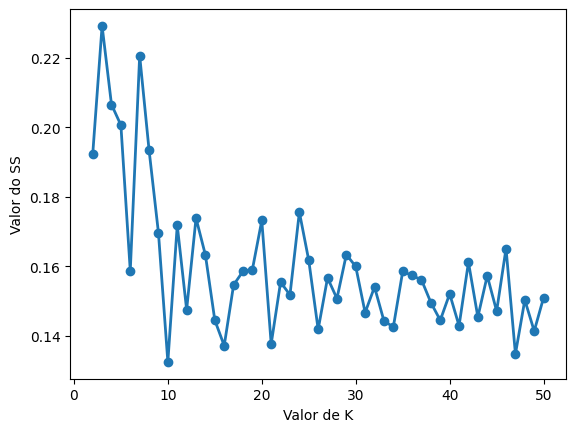

In [106]:
p = np.arange(2,51,1)

ss_list = []
for k in clusters:
    #define
    model = ct.KMeans(n_clusters=k,n_init='auto')

    #fit
    df_hat = model.fit_predict(df_clus)

    #performance
    ss = mt.silhouette_score(df_clus,df_hat)
    ss_list.append(ss)
    #print(f'Clusters: {k} - SS:{ss}')
    
#PLOT das Silhuetas 
plt.plot(clusters,ss_list,marker='o',linewidth=2)
plt.xlabel('Valor de K')
plt.ylabel('Valor do SS')

In [109]:
p_best = p[ss_list.index(max(ss_list))] #Definido através do maior valor do silhouette score

#define
model = ct.KMeans(n_clusters=p_best,n_init='auto')

#fit
df_hat = model.fit_predict(df_clus)

#performance
ss = mt.silhouette_score(df_clus,df_hat)
clusters = len(np.unique(df_hat))

d = {'Algoritmo': 'K-Means','Número de clusters': clusters, 'Average Silhouette Score': ss}
kmeans = pd.DataFrame(data = d,index=[0])
kmeans

,Algoritmo,Número de clusters,Average Silhouette Score
0,K-Means,3,0.231572


## 3.3 Affinity Propagation

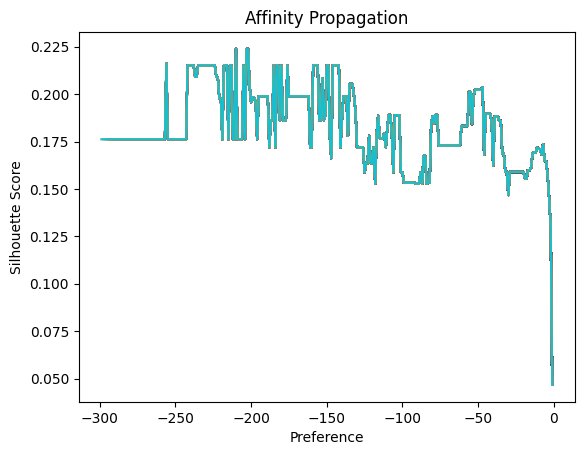

In [114]:
#testing parameters
#Finetuning Visual
p = np.arange(-1,-301,-1)

ss_list = []
for i in range(len(p)):
    #model definition
    model = ct.AffinityPropagation(preference=p[i])

    #model training
    model.fit(df_clus)

    #model performance
    labels = model.predict(df_clus)

    #performance
    ss = mt.silhouette_score(df_clus,labels)
    ss_list.append(ss)
    
    #plot
    plt.plot(p[:i],ss_list[:i])#traz todos os parâmetros até esse ponto
    plt.title('Affinity Propagation');
    plt.xlabel('Preference');
    plt.ylabel('Silhouette Score');

In [115]:
p_best = p[ss_list.index(max(ss_list))] #Definido através do maior valor do silhouette score

#model definition
af = ct.AffinityPropagation(preference=p_best)

#model training
af.fit(df_clus)

#model performance
labels = af.predict(df_clus)
clusters = len(np.unique(labels))
ss = mt.silhouette_score(df_clus,labels)

d = {'Algoritmo': 'Affinity Propagation','Número de clusters': clusters, 'Average Silhouette Score': ss}
af_pp = pd.DataFrame(data = d,index=[0])
af_pp

,Algoritmo,Número de clusters,Average Silhouette Score
0,Affinity Propagation,3,0.22382


## 3.4 Resultado Final

In [112]:
clusterizacao = pd.concat([kmeans,af_pp]).reset_index(drop=True)
clusterizacao

,Algoritmo,Número de clusters,Average Silhouette Score
0,K-Means,3,0.231572
1,Affinity Propagation,3,0.223820
